# Example usage
Here is a demonstration of using "organage" to estimate organ-specific biological age from SomaScan data. 

"organage" requires SomaScan v4 (5k proteins) or v4.1 (7k proteins) data. 

In [30]:
from organage import OrganAge
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Load data

### sample x metadata dataframe
- index should be sample name
- "Age" and "Sex_F" are required columns in this dataframe.
- other columns are optional

In [16]:
md_hot = pd.read_csv("md_hot.csv")
md_hot = md_hot.set_index("ID")
md_hot.head()

,Age,Sex_F
ID,,
0,57.48,0
1,62.02,0
2,80.02,0
3,86.45,0
4,75.94,0


### sample x protein expression dataframe
- index should be sample name
- columns should be "SeqId"s from SomaScan data. 
- values should be ANML normalized expression data in RFU units. These values are the raw values from the '.anmlSMP.adat' file provided by Somalogic


In [15]:
df_prot = pd.read_csv("df_prot.csv")
df_prot = df_prot.set_index("ID")
df_prot.head()

,10000-28,10001-7,10003-15,10006-25,10008-43,10010-10,10011-65,10012-5,10014-31,10015-119,...,9984-12,9986-14,9987-30,9989-12,9991-112,9993-11,9994-217,9995-6,9997-12,9999-1
ID,,,,,,,,,,,,,,,,,,,,,
0,458.8,419.6,151.9,560.3,519.9,278.4,2907.2,1599.9,854.6,495.3,...,589.8,2767.3,512.1,423.9,449.4,902.7,1393.0,2584.1,18356.7,2626.1
1,494.3,367.6,173.3,579.1,465.4,328.3,3450.7,1704.8,803.9,584.5,...,627.0,2276.5,597.5,417.1,598.4,1113.2,1423.2,1745.9,18518.3,2048.3
2,511.1,855.7,153.5,610.9,405.8,280.1,2039.5,1210.7,872.9,586.3,...,532.6,3122.9,657.8,413.0,445.2,888.9,1306.2,4939.9,30265.4,6404.4
3,626.0,833.0,153.6,773.3,412.4,269.6,1700.6,1469.8,823.8,1513.3,...,577.6,1350.4,509.2,389.1,394.7,1508.6,1619.8,9926.2,45930.1,4727.3
4,529.4,672.7,137.0,745.2,433.1,270.3,2280.3,1423.6,1410.3,587.0,...,629.2,2200.8,495.2,343.1,437.1,967.3,1350.0,6744.6,30870.9,4305.9


# Estimate organ-specific biological age


In [20]:
data = OrganAge.CreateOrganAgeObject()
data.add_data(md_hot, df_prot)
data.normalize(assay_version="v4.1")  #requires "v4" or "v4.1"
res = data.estimate_organ_ages()
res

Heart...
Liver...
Artery...
Immune...
Intestine...
Adipose...
Brain...
Muscle...
Lung...
Pancreas...
Kidney...
Organismal...


,Age,Sex_F,Predicted_Age,yhat_lowess,AgeGap,AgeGap_zscored,Organ
ID,,,,,,,
0,57.48,0,58.468715,50.553949,7.914766,1.333150,Heart
1,62.02,0,47.324957,52.058055,-4.733098,-0.797235,Heart
2,80.02,0,49.876782,59.643091,-9.766308,-1.645021,Heart
3,86.45,0,49.359628,62.450962,-13.091334,-2.205083,Heart
4,75.94,0,52.963826,57.877699,-4.913873,-0.827685,Heart
...,...,...,...,...,...,...,...
15,82.66,0,73.247118,78.041765,-4.794646,-1.208418,Organismal
16,73.30,1,68.324842,69.820276,-1.495434,-0.376901,Organismal
17,73.61,1,73.151725,70.091042,3.060683,0.771399,Organismal


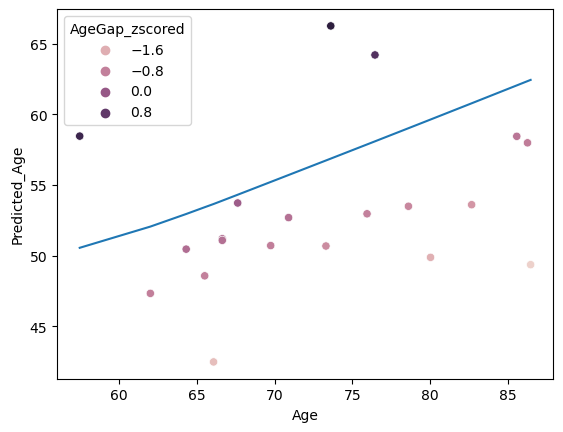

In [33]:
toplot = res.loc[res.Organ=="Heart"]
toplot = toplot.sort_values("Age")
sns.scatterplot(data=toplot, x="Age", y="Predicted_Age", hue="AgeGap_zscored")
plt.plot(toplot.Age, toplot.yhat_lowess)
plt.show()
